## Additional import for adding package path for iCSF

This adds the paths required if doing analysis using the iCSF. Only run this cell if you are on the iCSF.

In [ ]:
import sys
sys.path.append("/mnt/iusers01/jf01/mbcx9cd4/.local/lib/python3.6/site-packages")
print('\n'.join(sys.path))
#add the right path to look for the packages (incl. lmfit)

## Import packages

In [1]:
#import the models and plotting tools

import numpy as np
import matplotlib.pyplot as plt

#import diamond_functions as dia
from diamond_functions import *

#for graphs inline with the text on mac and widows...
%matplotlib inline
#for interactive graphs inline with the text on mac and widows...
#%matplotlib interactive
#best for pop-out graphs on windows...
#%matplotlib tk
#best for pop-out graphs on mac...
# %matplotlib
#for pop-out graphs on mac and windows, but it's a bit dodgey...
#%matplotlib qt

## Adjusting plot parameters

In [2]:
plt.rc('xtick',labelsize=24)
plt.rc('ytick',labelsize=24)
plt.rc('legend',fontsize=20)
plt.rc('axes',linewidth=2)
plt.rc('xtick.major',width=2,size=10)
plt.rc('xtick.minor', width=2, size=5)
plt.rc('ytick.major',width=2,size=10)
plt.rc('ytick.minor',width=2,size=5)

## File Prefix

Set filePrefix here, this is used throughout the script for the directory and file name

In [7]:
filePrefix = "adc_041_7Nb_NDload_700C_15mms"
dataFolder = 'example_data/'
dataNameExtension = '_ascii/'
fileType='.dat'

## Create merged cake files for increasing intensity or greater no. of points

If you want to sum any cakes together to increase peak intensity use:

Note, bottom merges the bottom 3 slices, top is top 3 slices, vertical is top and bottom, horizontal is 3 slices from left and 3 slices from the right.

In [ ]:
# merge_peak_intensity(filePrefix, 1, 5657, 'bottom')
# merge_peak_intensity(filePrefix, 1, 5657, 'top')
# merge_peak_intensity(filePrefix, 1, 5657, 'vertical')
# merge_peak_intensity(filePrefix, 1, 5657, 'horizontal')

# merge_peak_intensity(filePrefix, 1, 5657, 'horizontal')

If you want to merge any cakes to add a greater number of intensity points use:

In [ ]:
# merge_peak_points(filePrefix, 1, 5657, 'bottom')
# merge_peak_points(filePrefix, 1, 5657, 'top')
# merge_peak_points(filePrefix, 1, 5657, 'vertical')
# merge_peak_points(filePrefix, 1, 5657, 'horizontal')

merge_peak_points(filePrefix, dataFolder, dataNameExtension, fileType, 1, 10, 'vertical')

## Analyse single image file using the class object

Define directory and filename:

In [8]:
dirname=dataFolder+filePrefix+dataNameExtension
fname=filePrefix + '_00001.dat'

Define different directory and filename if analysing merged data (as created above):

In [ ]:
dirname=dataFolder+filePrefix+dataNameExtension+'/Merge/'
# fname=filePrefix + '_MergeCakePoints1+2+3_02000.dat'
# fname=filePrefix + '_MergeCakePoints_bottom_00001.dat'
# fname=filePrefix + '_MergeCakePoints_top_00001.dat'
# fname=filePrefix + '_MergeCakePoints_vertical_00001.dat'
# fname=filePrefix + '_MergeCakePoints_horizontal_00001.dat'

fname=filePrefix + '_MergeCakePoints_vertical_00001.dat'

Create a FitCake (class) instance:

In [9]:
#note, in Dawn 0 deg is defined as right hand side of diffraction image and increases clockwise.
#therefore, column 1 is right hand cake at -5 to 5 deg if using 10 deg slices i.e. in Dawn (-5,355).
#column 0 is the two-theta data in the file.

# image_1=FitCake(dirname,fname,cake=28)
image_1=FitCake(dirname,fname,cake=1)

OSError: example_data/adc_041_7Nb_NDload_700C_15mms_ascii/adc_041_7Nb_NDload_700C_15mms_00001.dat not found.

Use the spectrum in the object and the plot_spectrum function to plot the entire spectrum:

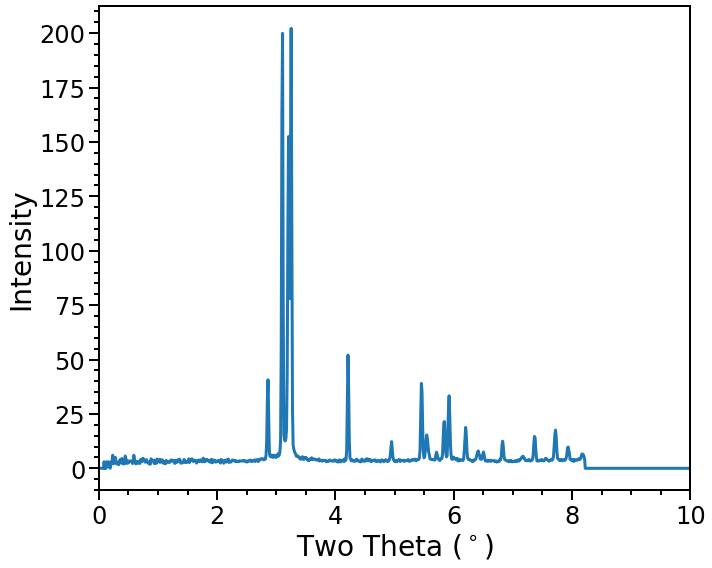

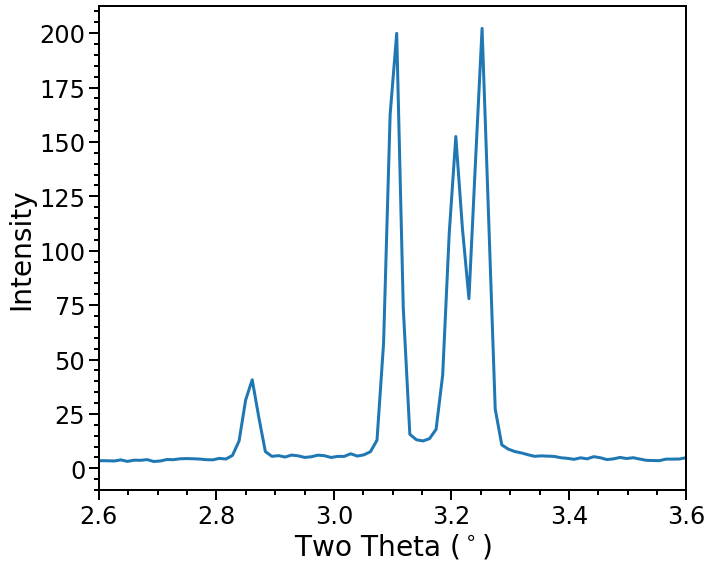

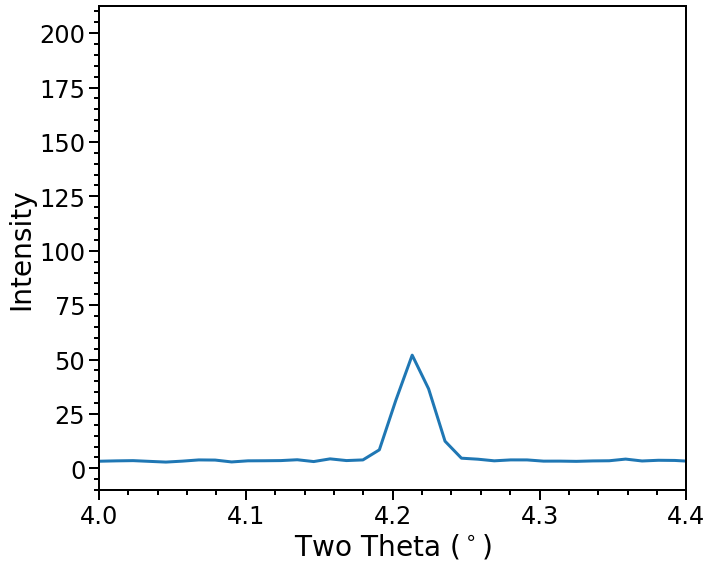

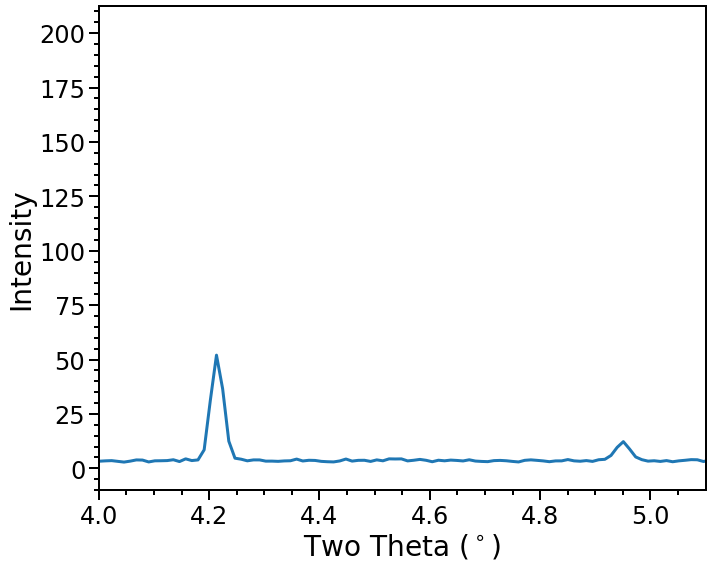

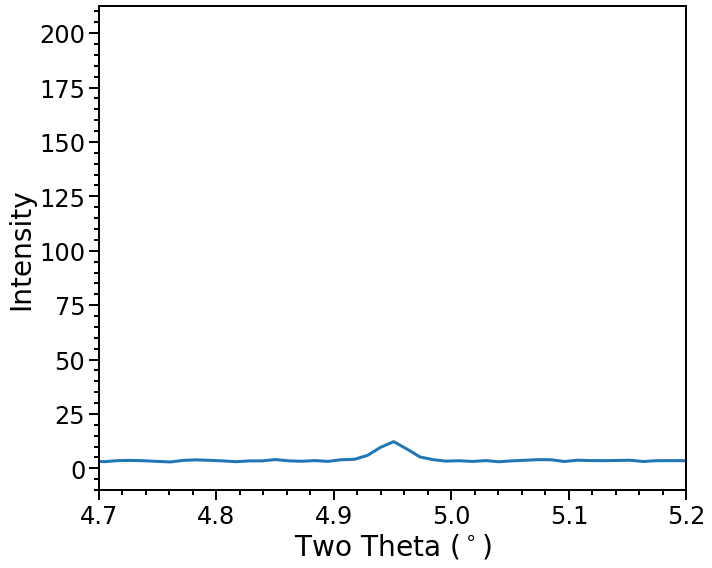

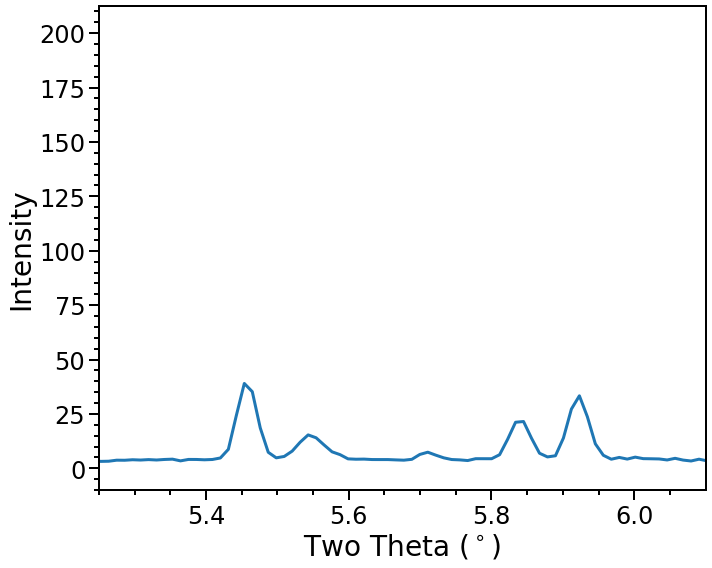

In [6]:
image_1.plot_spectrum()
image_1.plot_spectrum(2.6,3.6) #10-10, 0002, 110, 10-11 (fit 0002 and 10-11 as double peaks)
image_1.plot_spectrum(4.0,4.4) #10-12
image_1.plot_spectrum(4.0,5.1) #200
image_1.plot_spectrum(4.7,5.2) #11-20
image_1.plot_spectrum(5.25,6.1) #10-13, 211, 20-20, 11-22, 20-21 (fit 11-22 and 20-21 as double peaks)
# and also fit 10-13 and 211 as double peaks.

Define peak bounds and labels by checking the peaks (note, these will be adjusted during the run, but the width will be kept constant):

In [ ]:
peak_bounds_initial = [(2.7, 3.0), (4.05, 4.35), (4.40, 4.70), (4.85, 5.07)]
peak_labels_initial = ['(10-10)', '(10-12)', '(200)', '(11-20)']

# peak_bounds_initial = [(2.7, 3.0), (4.05, 4.35), (4.40, 4.70), (4.85, 5.07), (5.35, 5.57)]
# peak_labels_initial = ['(10-10)', '(10-12)', '(200)', '(11-20)', '(10-13)']

In [ ]:
# peak_bounds_initial = [(5.35, 5.60)]
# peak_labels_initial = ['(211)']

The method `fit_peaks` fits the peaks defined:

In [ ]:
image_1.fit_peaks(peak_labels_initial, peak_bounds_initial)

Results for each peak can be just looked up:

In [ ]:
image_1.fits_dict['(10-10)'].values

Peak centre:

In [ ]:
image_1.fits_dict['(10-10)'].values['center']

There is also a method for plotting the fit:

In [ ]:
image_1.plot_fit('(11-20)')

## Run through all 'images'

Fit the peaks without passing initial parameters.

Note, options are 'normal' or 'bottom', 'top', 'vertical', 'horizontal' for merged cake points (merged intensity points not currently included).

In [ ]:
# fits=run_thru_images(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'normal', step=1, cake=1)
# fits=run_thru_images(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'bottom', step=1, cake=1)
# fits=run_thru_images(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'top', step=1, cake=1)
# fits=run_thru_images(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'vertical', step=1, cake=1)
# fits=run_thru_images(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'horizontal', step=1, cake=1)

fits=run_thru_images(filePrefix, dirname, 1, 10, peak_bounds_initial, peak_labels_initial, 'vertical', step=1, cake=1)

We could also pass on the initial parameters in the fittings, but this can lead to errors during the run:

In [ ]:
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial,'one', 'normal', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial,'one', 'bottom', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial,'one', 'top', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial,'one', 'vertical', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial,'one', 'horizontal', step=1, cake=1)

fits=run_thru_images_initParams(filePrefix, dirname, 1, 10, peak_bounds_initial, peak_labels_initial, 'vertical','one', step=1, cake=1)

This creates a dictionary with all the class objects contaiing the fits:

In [ ]:
print(fits)

In [ ]:
fits.keys()

### Still confused about where our fitted data is???

Dictionary called fits contains keys (with the image name/number) and a FitCake class object for each key. 
The FitCake class object then contains;

- a list of the reflections (reflection_list)
- a dictionary containing the data (2-theta and intensity) for each of the reflections (data_dict)
- a dictionary containing the fitted line to the data, 100x 2-theta and intensity points, for each of the relections (lines_dict)
- a dictionary containing the class object from the lmfit model for each of the reflections (fits_dict)

In [ ]:
fit_number='_00001'
fit_string=filePrefix+fit_number

# print(fits)
# print(fits[fit_string])
# print(fits[fit_string].reflection_list)
# print(fits[fit_string].data_dict)
# print(fits[fit_string].lines_dict)
print(fits[fit_string].fits_dict)

The lmfit model class object contains a dictionary of parameters, such as peak center, fwhm, etc.

In [ ]:
# print(fits[fit_string].fits_dict['(10-10)'].params)
# print(fits[fit_string].fits_dict['(10-10)'].params['sigma'])
print(fits[fit_string].fits_dict['(10-10)'].values)

## Fit overlapping peaks

Define directory and filename:

In [ ]:
dirname=dataFolder+filePrefix+dataNameExtension
fname=filePrefix + '_00001.dat'

Define different directory and filename if analysing merged data:

In [ ]:
dirname=dataFolder+filePrefix+dataNameExtension+'/Merge/'
#fname=filePrefix + '_MergeCakePoints1+2+3_00001.dat'
# fname=filePrefix + '_MergeCakePoints_bottom_00001.dat'
# fname=filePrefix + '_MergeCakePoints_top_00001.dat'
# fname=filePrefix + '_MergeCakePoints_vertical_00001.dat'
# fname=filePrefix + '_MergeCakePoints_horizontal_00001.dat'
fname=filePrefix + '_MergeCakePoints_vertical_00001.dat'

Create a Fit2Peak or Fit3Peak instance (different class for fitting overlapping peaks):

In [ ]:
image_1=Fit2Peak(dirname,fname,cake=1)

In [ ]:
image_1=Fit3Peak(dirname,fname,cake=1)

Use the spectrum in the object and the plot_spectrum function to plot the entire spectrum:

In [ ]:
image_1.plot_spectrum(6.62,7.1)

# image_1.plot_spectrum(2.6,3.6) #10-10, 0002, 110, 10-11 (fit 0002 and 10-11 as double peaks)
# image_1.plot_spectrum(4.0,4.4) #10-12
# image_1.plot_spectrum(4.0,5.1) #200
# image_1.plot_spectrum(4.7,5.2) #11-20
# image_1.plot_spectrum(5.25,6.1) #10-13, 211, 20-20, 11-22, 20-21 (fit 11-22 and 20-21 as double peaks)
# # and also fit 10-13 and 211 as double peaks.

Define peak bounds (in this case covering the 3 overlapping peaks for the entire thermo-mechanical cycle) and labels of the overlapping peaks as a single string:

In [ ]:
peak_bounds_initial = [(3.0, 3.5)]
peak_labels_initial = ['(0002),(110),(10-11)']
#starting centres for the function fit_two_peaks are 3.42, 3.54, 3.59

#note, min and max values are not the same as bounds around the peak, but values that they can go up to!
pv_1_cent=3.09
pv_1_min=3.05
pv_1_max=3.11

pv_2_cent=3.205
pv_2_min=3.13
pv_2_max=3.21

pv_3_cent=3.25
pv_3_min=3.222
pv_3_max=3.28

In [ ]:
peak_bounds_initial = [(3.0, 3.5)]
peak_labels_initial = ['(110),(10-11)']
#starting centres for the function fit_two_peaks are 3.42, 3.54, 3.59

#note, min and max values are not the same as bounds around the peak, but values that they can go up to!
# pv_1_cent=3.205
# pv_1_min=3.15
# pv_1_max=3.205

# pv_2_cent=3.25
# pv_2_min=3.222
# pv_2_max=3.28

pv_1_cent=3.205
pv_1_min=3.13
pv_1_max=3.21

pv_2_cent=3.25
pv_2_min=3.222
pv_2_max=3.28

In [ ]:
peak_bounds_initial = [(6.15, 6.71)]
peak_labels_initial = ['(11-22),(20-21)']
#starting centres for the function fit_two_peaks are 6.45, 6.54

#note, min and max values are not the same as bounds around the peak, but values that they can go up to!
# pv_1_cent=6.32
# pv_1_min=6.30
# pv_1_max=6.47

# pv_2_cent=6.47
# pv_2_min=6.46
# pv_2_max=6.56

pv_1_cent=6.41
pv_1_min=6.28
pv_1_max=6.47

pv_2_cent=6.50
pv_2_min=6.43
pv_2_max=6.56

In [ ]:
peak_bounds_initial = [(6.62, 7.10)]
peak_labels_initial = ['(0004),(220)']
#starting image is around 1700 
#starting centres for the function fit_two_peaks are 6.78, 6.94

#note, min and max values are not the same as bounds around the peak, but values that they can go up to!
pv_1_cent=6.75
pv_1_min=6.37
pv_1_max=6.85

pv_2_cent=6.92
pv_2_min=6.86
pv_2_max=7.02

In [ ]:
peak_bounds_initial = [(5.2, 5.63)]
peak_labels_initial = ['(10-13),(211)']
#starting image is around 1700 
#starting centres for the function fit_two_peaks are 6.78, 6.94

#note, min and max values are not the same as bounds around the peak, but values that they can go up to!
pv_1_cent=5.45
pv_1_min=5.35
pv_1_max=5.47

pv_2_cent=5.55
pv_2_min=5.46
pv_2_max=5.56

The method `fit_2_peaks` or `fit_3_peaks` now fits three overlapping peaks:

In [ ]:
image_1.fit_2_peaks(peak_labels_initial, peak_bounds_initial, 
                    pv_1_cent, pv_1_min, pv_1_max,
                    pv_2_cent, pv_2_min, pv_2_max)

In [ ]:
image_1.fit_3_peaks(peak_labels_initial, peak_bounds_initial, 
                    pv_1_cent, pv_1_min, pv_1_max,
                    pv_2_cent, pv_2_min, pv_2_max,
                    pv_3_cent, pv_3_min, pv_3_max)

Results for the fit to all three peaks can be looked up:

In [ ]:
# image_1.fits_dict['(11-22),(20-21)'].values
# image_1.fits_dict['(10-13),(211)'].values
image_1.fits_dict['(0002),(110),(10-11)'].values

Now, the peak centre of each peak is additionally labelled pv_1, pv_2 and pv_3:

In [ ]:
print('peak centres...')
print(image_1.fits_dict['(0002),(110),(10-11)'].values['pv_1center'])
print(image_1.fits_dict['(0002),(110),(10-11)'].values['pv_2center'])
print(image_1.fits_dict['(0002),(110),(10-11)'].values['pv_3center'])

print('peak sigmas...')
print(image_1.fits_dict['(0002),(110),(10-11)'].values['pv_1sigma'])
print(image_1.fits_dict['(0002),(110),(10-11)'].values['pv_2sigma'])
print(image_1.fits_dict['(0002),(110),(10-11)'].values['pv_3sigma'])

The three peak fit can also be plotted:

In [ ]:
image_1.plot_fit('(0002),(110),(10-11)')
# image_1.plot_fit('(110),(10-11)')
# image_1.plot_fit('(11-22),(20-21)')
# image_1.plot_fit('(10-13),(211)')
# image_1.plot_fit('(0004),(220)')

### Run through all images with overlapping peaks

With fitting 2 or 3 overlapping peaks, choose a two-theta range which covers the peaks over the entire thermomechanical cycle. Currrently, peak bounds aren't adjusted within the loop in this case.

The initial parameters need to be passed in this case, so that the pseudo-voigt fit correctly identifies the three peaks each time.

Fitting 2 peaks:

In [ ]:
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'normal','two', step=1, cake=1,)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'bottom','two', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'top','two', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'vertical','two', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'horizontal','two', step=1, cake=1)

fits=run_thru_images_initParams(filePrefix,dirname, 1, 10, peak_bounds_initial, peak_labels_initial, 'vertical','two', 
                                pv_1_cent, pv_1_min, pv_1_max,
                                pv_2_cent, pv_2_min, pv_2_max,
                                step=1, cake=1)


Fitting 3 peaks:

In [ ]:
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'normal','three', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'bottom','three', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'top','three', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'vertical','three', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'horizontal','three', step=1, cake=1)

fits=run_thru_images_initParams(filePrefix,dirname, 1, 10, peak_bounds_initial, peak_labels_initial, 'vertical','three', 
                                pv_1_cent, pv_1_min, pv_1_max,
                                pv_2_cent, pv_2_min, pv_2_max,
                                pv_3_cent, pv_3_min, pv_3_max,
                                step=1, cake=1)

## Check the fitting data

We can then easily plot the fits for each reflection:

In [ ]:
fit_number='_00001'
fit_string=filePrefix+fit_number

fit=fits[fit_string]
# '(10-10)', '(10-12)', '(200)', '(11-20)', '(10-13)'
# fit.plot_fit('(200)')
# fit.plot_fit('(10-12)')

fit.plot_fit('(0002),(110),(10-11)')
# fit.plot_fit('(110),(10-11)')
# fit.plot_fit('(11-22),(20-21)')
# fit.plot_fit('(10-13),(211)')
# fit.plot_fit('(211)')
# fit.plot_fit('(0004),(220)')


# fit.fits_dict['(11-22),(20-21)'].values
# fit.fits_dict['(10-13),(211)'].values

Note, if you weren't able to fit the peaks at the start and you skipped some images, then the graph will not show the correct image number (i.e. image number + skipped files).

In [ ]:
fit=fits[fit_string]
fit.plot_spectrum()
# fit=fits['adc_065_TI64_NDload_900C_15mms_03297']
# fit.plot_spectrum()